# Hierarchical Model with non-common $\sigma^2$ and fixed $\nu$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
VARIABLE = 'MonthlyIncome'
ALPHA_LEVEL = 0.05

---

Read the data

In [3]:
Dat = pd.read_csv("../../../Data/Processed/DataProvince.csv")
ProvincesProvinceIdRegion = pd.read_csv("../../../Data/Enriched/ProvincesProvinceIdRegion.csv")

In [4]:
Dat = pd.merge(Dat, ProvincesProvinceIdRegion, on='ProvinceId')

In [5]:
Dat['Region'] = Dat['Region'].replace(
    {
        'NorthernThailand': 'Northern Thailand'
        , 'SouthernThailand': 'Southern Thailand'
        , 'WesternThailand': 'Western Thailand'
        , 'EasternThailand': 'Eastern Thailand'
        , 'NortheastThailand': 'Northeast Thailand'
        , 'CentralThailand': 'Central Thailand'
    }
)

Calculate the statistics per region

In [6]:
DatRegion = Dat[[VARIABLE + 'Mean', 'Region']].groupby('Region').agg(['count', 'mean', 'std']).reset_index()

DatRegion.columns = DatRegion.columns.droplevel()

DatRegion = DatRegion.rename(
    columns={
        '':'Region'
        , 'count': 'NumberObservations'
        , 'mean': VARIABLE + 'Mean'
        , 'std': VARIABLE + 'Std'}
    )

DatRegion = DatRegion.sort_values(VARIABLE + 'Mean').reset_index(drop=True)

J = len(DatRegion)

---

In [12]:
ES2 = (DatRegion[VARIABLE + 'Std']**2).mean()
VS2 = (DatRegion[VARIABLE + 'Std']**2).var()

HatNu = 2 * ES2**2 / VS2 + 4
HatRho2 = (ES2**2 + VS2) / (ES2**2 + 2*VS2) * ES2

In [9]:
def ESigma2Func(j, nu):
    DatAux = DatRegion[DatRegion['Region']== j]
    return (nu * HatRho2 + DatAux['NumberObservations'] * DatAux[VARIABLE + 'Std']**2) / (nu + DatAux['NumberObservations'] - 2)

ESigma2Func = np.vectorize(ESigma2Func)

def StdSigma2Func(j, nu):
    DatAux = DatRegion[DatRegion['Region']== j]
    return np.sqrt(2) * (nu * HatRho2 + DatAux['NumberObservations'] * DatAux[VARIABLE + 'Std']**2) / ((nu + DatAux['NumberObservations'] - 2) * np.sqrt(nu + DatAux['NumberObservations'] - 4))

StdSigma2Func = np.vectorize(StdSigma2Func)

In [10]:
NuVect = np.linspace(0.01,100,100)

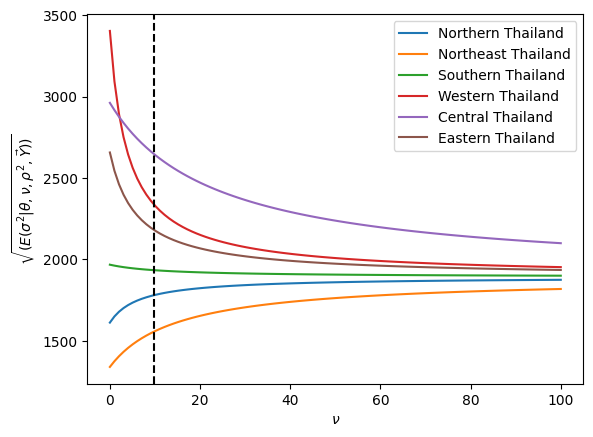

In [13]:
for j in DatRegion['Region']:
    plt.plot(NuVect, np.sqrt(ESigma2Func(j, NuVect)), label=j)

plt.xlabel(r'$\nu$')
plt.ylabel(r'$\sqrt{(E(\sigma^2|\theta,\nu,\rho^2,\vec{Y}))}$')
plt.legend(loc = 'upper right')
plt.axvline(HatNu, ls='--', color='k')

# plt.savefig("Images/5_ExpectedSigmaFixedNu.png", bbox_inches = "tight")

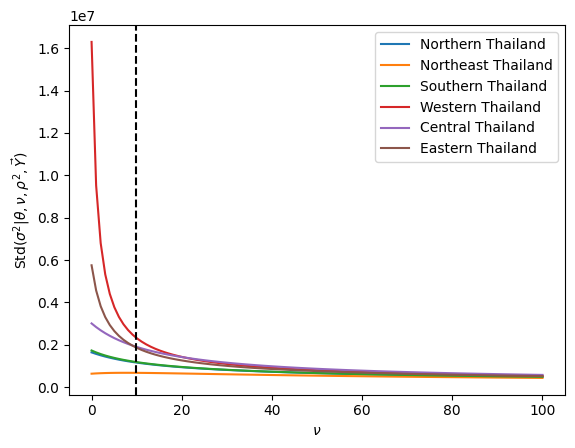

In [14]:
for j in DatRegion['Region']:
    plt.plot(NuVect, StdSigma2Func(j, NuVect), label=j)

plt.xlabel(r'$\nu$')
plt.ylabel(r'Std$(\sigma^2|\theta,\nu,\rho^2,\vec{Y})$')
plt.legend(loc = 'upper right')
plt.axvline(HatNu, ls='--', color='k')

# plt.savefig("Images/5_StdSigma2FixedNu.png", bbox_inches = "tight")